In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def split_real_im(c): 
    c = complex(c)
    return pd.Series([c.real,c.imag])

In [3]:
# import input and target data 
all_input = pd.read_csv("../Samples_3-bus/oT_Result_NN_Input_3-bus.csv")
all_output = pd.read_csv("../Samples_3-bus/oT_Result_NN_Output_3-bus.csv")

In [4]:
timestamps = np.unique(all_input.LoadLevel)
variables = np.unique(all_input.Variable)
executions = np.unique(all_input.Execution)
periods = np.unique(all_input.Period)
scenarios = np.unique(all_input.Scenario)

In [14]:
#Select a certain scenario and execution
exe = executions[0]
per = periods[0]
sc = scenarios[0]



variables_to_keep = variables[4:]
variables_to_keep_o = np.sort(np.unique(all_output.Variable))[[0,1,3,4]]

#Filter the main frame on desired parameters: 
f_i = (all_input.LoadLevel.isin(timestamps))& (all_input.Execution == exe ) & (all_input.Period == per )& (all_input.Scenario == sc)& (all_input.Variable.isin(variables_to_keep))
input_f = pd.DataFrame(all_input[f_i])

f_o = (all_output.LoadLevel.isin(timestamps))& (all_output.Execution == exe ) & (all_output.Period == per )& (all_output.Scenario == sc)& (all_output.Variable.isin(variables_to_keep_o))
output_f = pd.DataFrame(all_output[f_o])

#And then add to new frame the two parts of the complex numbers: 
input_f[['Value_R', 'Value_I']] = input_f["Value"].apply(split_real_im)

#Pivot 
input_f_p = input_f.pivot(index = "LoadLevel",columns=["Variable"],values = ["Value_R","Value_I"])
output_f_p = output_f.pivot(index = "LoadLevel",columns=["Variable"],values = ["Value"])

#Write to separate csv file
input_f_p.to_csv(f"Data/input_f_{sc}_{exe}_{per}.csv")
output_f_p.to_csv(f"Data/output_f_{sc}_{exe}_{per}.csv")

In [13]:
variables

array(['CCGT_1', 'CCGT_2', 'CCGT_3', 'ESS1', 'Node_1', 'Node_1_Node_1',
       'Node_1_Node_2', 'Node_1_Node_3', 'Node_2', 'Node_2_Node_1',
       'Node_2_Node_2', 'Node_2_Node_3', 'Node_3', 'Node_3_Node_1',
       'Node_3_Node_2', 'Node_3_Node_3', 'SolarPV_1', 'WindFarm_1'],
      dtype=object)

In [12]:
input_f_p["Value_R"]

Variable,Node_1,Node_1_Node_1,Node_1_Node_2,Node_1_Node_3,Node_2,Node_2_Node_1,Node_2_Node_2,Node_2_Node_3,Node_3,Node_3_Node_1,Node_3_Node_2,Node_3_Node_3,SolarPV_1,WindFarm_1
LoadLevel,,,,,,,,,,,,,,
2030-01-01T00:00:00+01:00,0.020000,0.979408,0.0,-0.979408,0.038000,0.0,-0.0,0.0,0.080000,-0.979408,0.0,0.979408,0.0,0.039269
2030-01-01T01:00:00+01:00,0.018806,0.979408,0.0,-0.979408,0.036586,0.0,-0.0,0.0,0.080779,-0.979408,0.0,0.979408,0.0,0.036176
2030-01-01T02:00:00+01:00,0.017910,0.979408,0.0,-0.979408,0.034082,0.0,-0.0,0.0,0.082229,-0.979408,0.0,0.979408,0.0,0.033555
2030-01-01T03:00:00+01:00,0.017612,0.979408,0.0,-0.979408,0.031849,0.0,-0.0,0.0,0.084907,-0.979408,0.0,0.979408,0.0,0.032192
2030-01-01T04:00:00+01:00,0.017612,0.979408,0.0,-0.979408,0.030226,0.0,-0.0,0.0,0.091965,-0.979408,0.0,0.979408,0.0,0.030223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030-12-30T19:00:00+01:00,0.025789,0.979408,0.0,-0.979408,0.047046,0.0,-0.0,0.0,0.093462,-0.979408,0.0,0.979408,0.0,0.069384
2030-12-30T20:00:00+01:00,0.024991,0.979408,0.0,-0.979408,0.047125,0.0,-0.0,0.0,0.091795,-0.979408,0.0,0.979408,0.0,0.068662
2030-12-30T21:00:00+01:00,0.024460,0.979408,0.0,-0.979408,0.046559,0.0,-0.0,0.0,0.087789,-0.979408,0.0,0.979408,0.0,0.066777


C:\Users\u0138303\AppData\Local\Temp\ipykernel_37296\3701956675.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pv_output = [complex(imaginary_string).real for imaginary_string in all_input[f][all_input.Variable =="SolarPV_1"].Value]
C:\Users\u0138303\AppData\Local\Temp\ipykernel_37296\3701956675.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wind_output = [complex(imaginary_string).real for imaginary_string in all_input[f][all_input.Variable =="WindFarm_1"].Value]


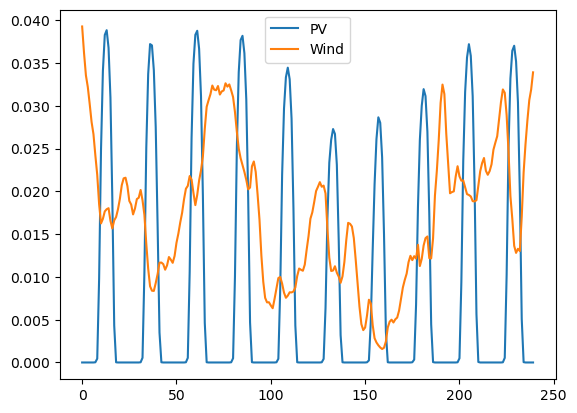

In [122]:
pv_output = [complex(imaginary_string).real for imaginary_string in all_input[f][all_input.Variable =="SolarPV_1"].Value]
wind_output = [complex(imaginary_string).real for imaginary_string in all_input[f][all_input.Variable =="WindFarm_1"].Value]
end = 240
plt.plot(pv_output[0:end],label = "PV")
plt.plot(wind_output[0:end], label = "Wind")
plt.legend()